In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d sobhanmoosavi/us-accidents

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 433, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

In [ ]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import RFE
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/Accident_Severity_Prediction/Data/US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(943318, 47)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     943318 non-null  object 
 1   Severity               943318 non-null  int64  
 2   Start_Time             943318 non-null  object 
 3   End_Time               943318 non-null  object 
 4   Start_Lat              943318 non-null  float64
 5   Start_Lng              943318 non-null  float64
 6   End_Lat                943318 non-null  float64
 7   End_Lng                943318 non-null  float64
 8   Distance(mi)           943318 non-null  float64
 9   Description            943318 non-null  object 
 10  Number                 943318 non-null  float64
 11  Street                 943318 non-null  object 
 12  Side                   943318 non-null  object 
 13  City                   943318 non-null  object 
 14  County                 943318 non-

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,9.433180e+05,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000,943318.000000
mean,2.064917,35.069960,-95.102568,35.070232,-95.102271,0.274626,7.924188e+03,63.833323,62.944833,64.544828,29.421216,9.201041,7.131648,0.004359
std,0.380617,5.796634,17.794343,5.796707,17.794098,0.883254,1.838707e+04,18.162256,19.773121,22.397021,1.022938,2.461330,5.412885,0.042675
min,1.000000,24.566027,-124.517744,24.566013,-124.509263,0.000000,0.000000e+00,-27.000000,-48.500000,1.000000,16.720000,0.000000,0.000000,0.000000
25%,2.000000,30.229957,-117.833342,30.230194,-117.833756,0.040000,1.274000e+03,51.000000,51.000000,49.000000,29.290000,10.000000,3.000000,0.000000
50%,2.000000,34.976113,-86.136779,34.976497,-86.137776,0.111000,4.001000e+03,66.000000,66.000000,66.000000,29.780000,10.000000,7.000000,0.000000
75%,2.000000,39.232680,-80.359477,39.232687,-80.358917,0.255000,9.467000e+03,78.000000,78.000000,83.000000,29.980000,10.000000,10.000000,0.000000
max,4.000000,48.996539,-67.484130,48.998144,-67.484130,112.968000,9.999997e+06,196.000000,196.000000,100.000000,58.160000,100.000000,1087.000000,9.990000


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
# size of unique values in each column
for i in df.columns:
  print(i,df[i].unique().size)

ID 943318
Severity 4
Start_Time 677458
End_Time 813297
Start_Lat 492876
Start_Lng 496405
End_Lat 481551
End_Lng 484892
Distance(mi) 5774
Description 511156
Number 43247
Street 100347
Side 2
City 8504
County 1411
State 49
Zipcode 309403
Country 1
Timezone 4
Airport_Code 1678
Weather_Timestamp 178645
Temperature(F) 247
Wind_Chill(F) 574
Humidity(%) 100
Pressure(in) 931
Visibility(mi) 47
Wind_Direction 23
Wind_Speed(mph) 82
Precipitation(in) 173
Weather_Condition 91
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


In [ ]:
df['Severity'].value_counts()

2    889904
4     29073
3     13716
1     10625
Name: Severity, dtype: int64

<AxesSubplot:xlabel='Severity', ylabel='count'>

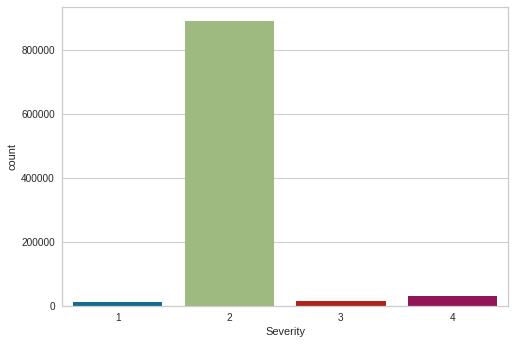

In [ ]:
sns.countplot(df['Severity'])

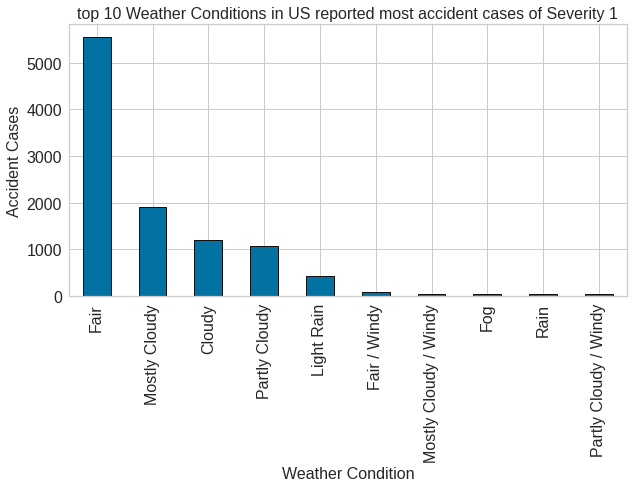

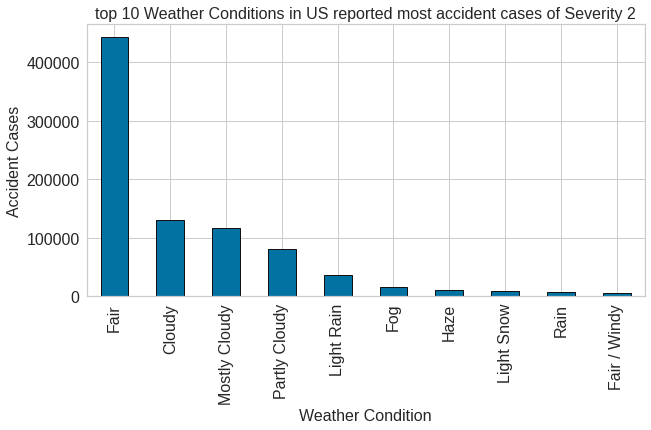

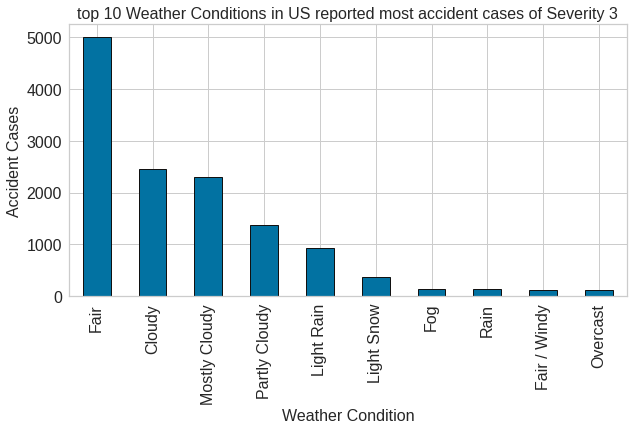

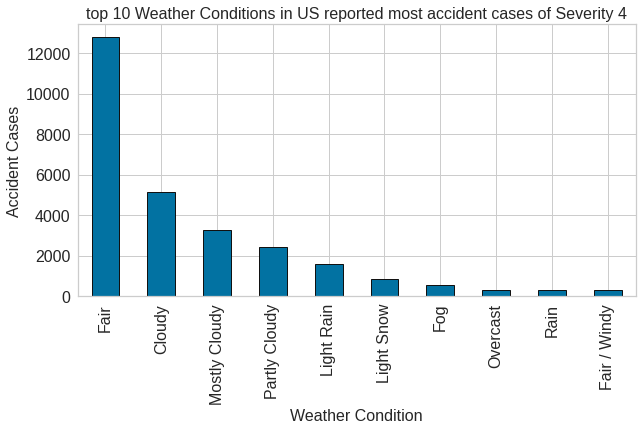

In [ ]:
for s in np.arange(1,5):
    plt.subplots(figsize=(10,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,color='b',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Cases',fontsize=16)
    plt.title('top 10 Weather Conditions in US reported most accident cases of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

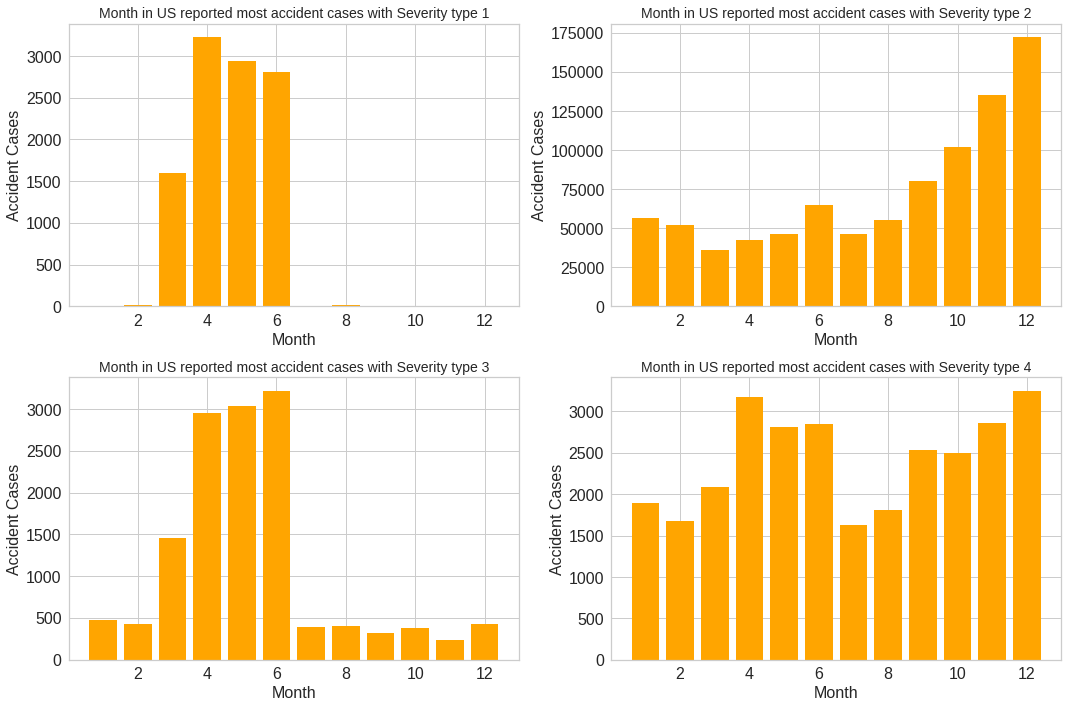

In [ ]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8, color='orange')
    plt.title("Month in US reported most accident cases with Severity type " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Cases", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

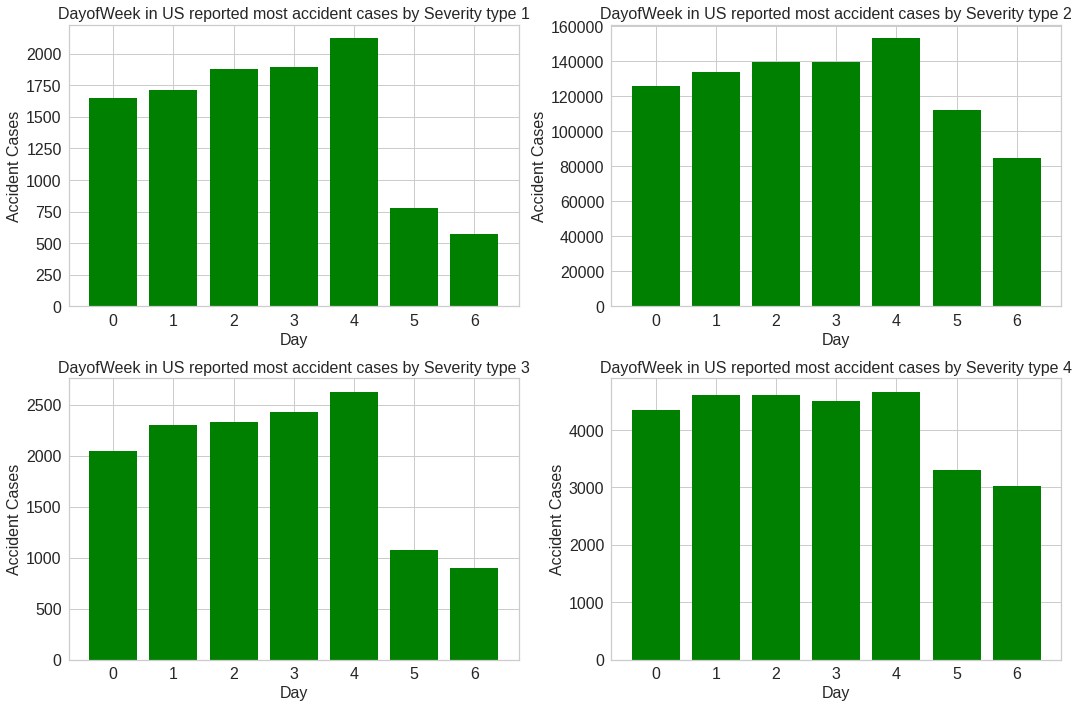

In [ ]:
df['DayOfWeek'] = df['time'].dt.dayofweek
plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(df.loc[df["Severity"] == s]['DayOfWeek'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8,color='green')
    plt.title("DayofWeek in US reported most accident cases by Severity type " + str(s), fontsize=16)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Cases", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

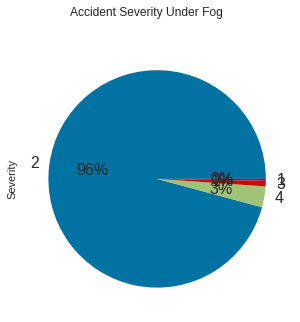

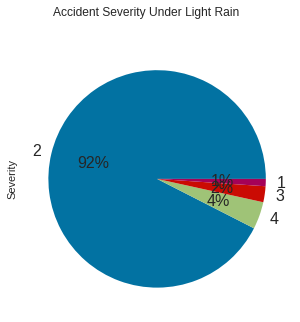

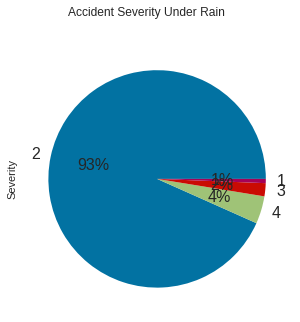

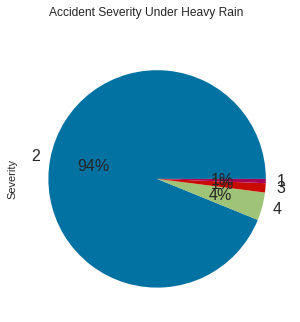

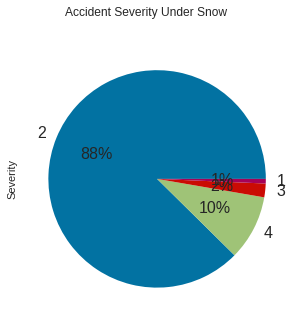

In [ ]:
for s in ["Fog","Light Rain","Rain","Heavy Rain","Snow"]:
  plt.subplots(figsize=(12,5))
  plt.suptitle('Accident Severity Under ' + s,fontsize=12)
  df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

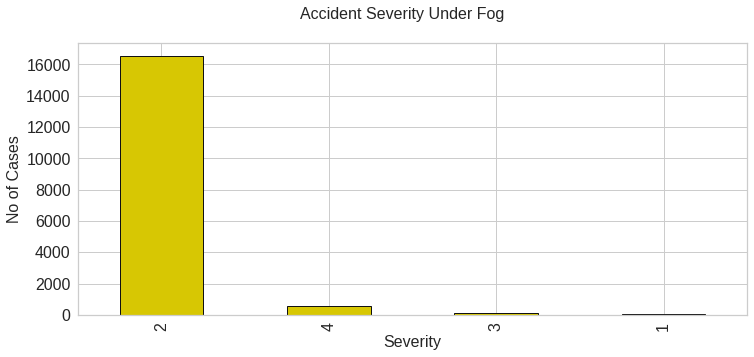

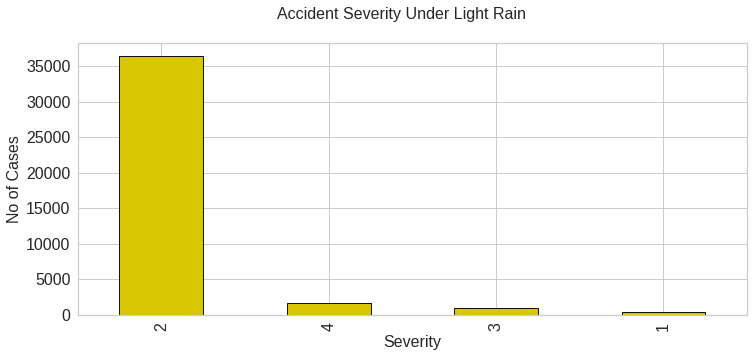

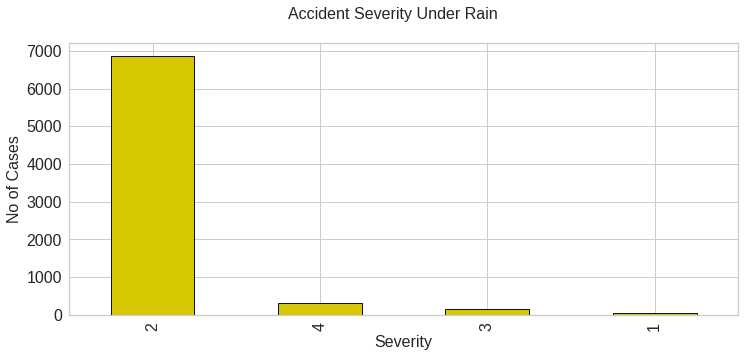

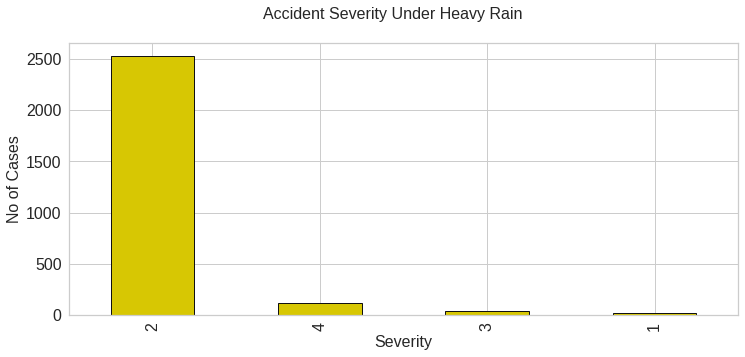

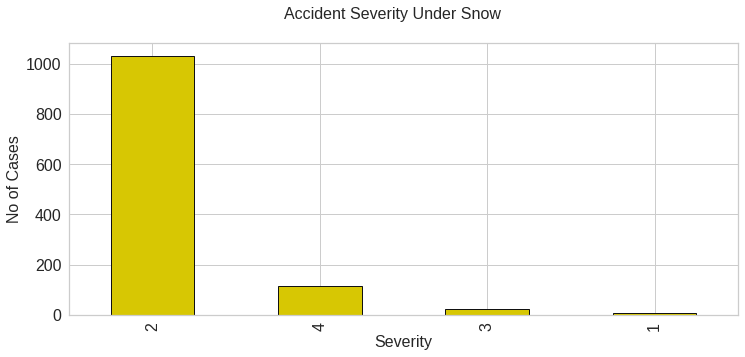

In [ ]:
for s in ["Fog","Light Rain","Rain","Heavy Rain","Snow"]:
    plt.subplots(figsize=(12,5))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,1,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('No of Cases',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,1,1)


Text(0, 0.5, 'State')

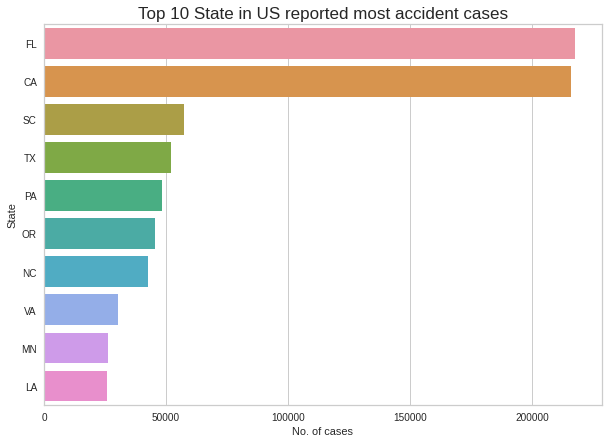

In [ ]:
top_state=df['State'].value_counts().head(10)
plt.figure(figsize=(10,7))
sns.barplot(y=top_state.index, x=top_state)
plt.title("Top 10 State in US reported most accident cases",size=17)
plt.xlabel('No. of cases')
plt.ylabel('State')


Text(0, 0.5, 'City')

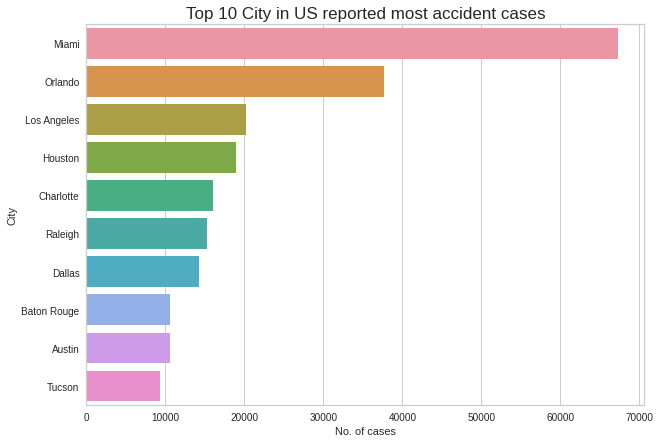

In [ ]:
top_city=df['City'].value_counts().head(10)
plt.figure(figsize=(10,7))
sns.barplot(y=top_city.index, x=top_city)
plt.title("Top 10 City in US reported most accident cases",size=17)
plt.xlabel('No. of cases')
plt.ylabel('City')

Text(0, 0.5, 'Street')

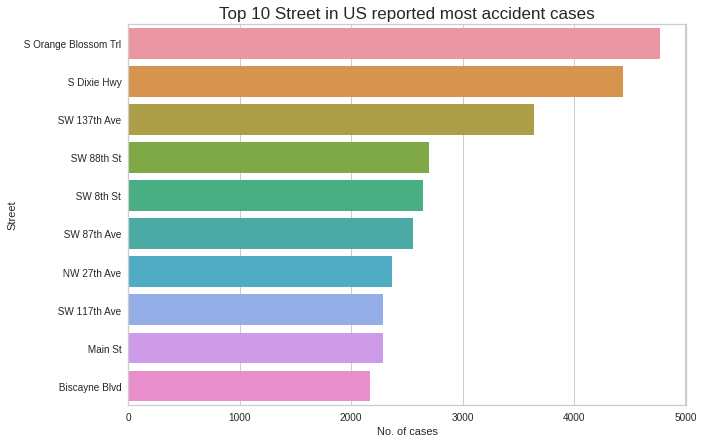

In [ ]:
top_city=df['Street'].value_counts().head(10)
plt.figure(figsize=(10,7))
sns.barplot(y=top_city.index, x=top_city)
plt.title("Top 10 Street in US reported most accident cases",size=17)
plt.xlabel('No. of cases')
plt.ylabel('Street')

Text(0, 0.5, 'No. of accidents')

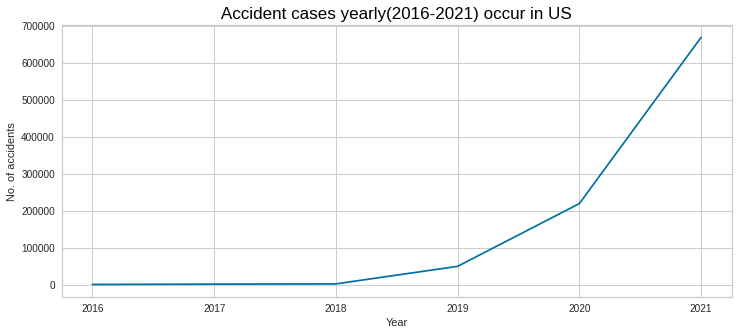

In [ ]:
yearly = pd.to_datetime(df['Start_Time']).dt.year.value_counts()
plt.figure(figsize=(12,5))
sns.lineplot(data=yearly)
plt.title(" Accident cases yearly(2016-2021) occur in US ",size=17,color="black")
plt.xlabel('Year')
plt.ylabel('No. of accidents')

In [ ]:
fig = go.Figure(
    data=go.Choropleth(
        locations = pd.value_counts(df['State']).index,
        z = pd.value_counts(df['State']).values.astype(float),
        locationmode = 'USA-states',
        colorscale = 'reds',
        colorbar_title = " Accident Counts"),

    layout=go.Layout(
        title_text='Accidents Counts by States (Feb 2016—Dec 2020)',
        title_x=0.5,
        font=dict(family='Calibri', size=14, color='MidnightBlue'),
        geo_scope='usa'))

fig.show()

<AxesSubplot:>

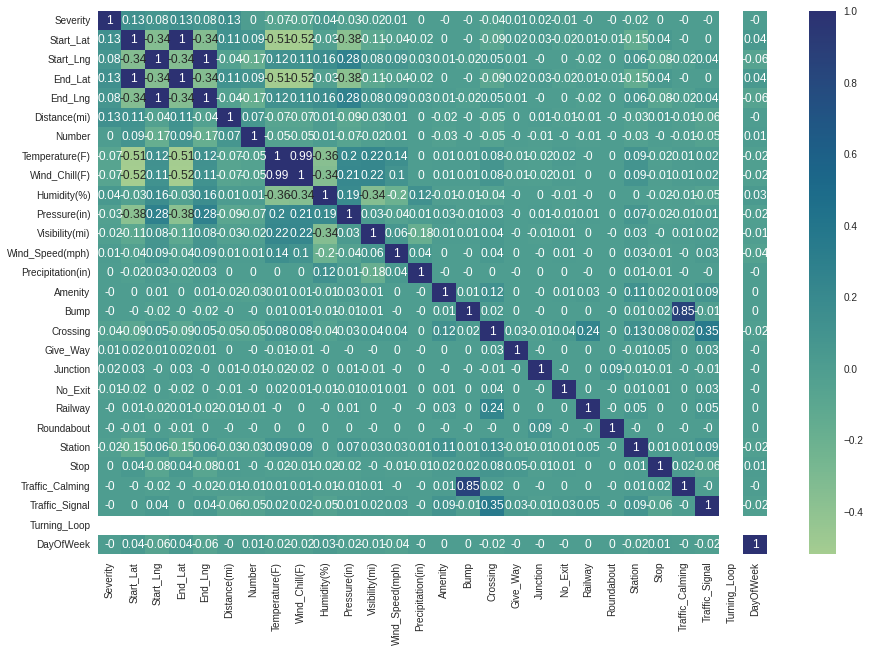

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot = True, cmap = 'crest')

In [ ]:
df = df.drop(['ID','Number','Start_Time', 'Start_Lat', 'Start_Lng','Description','Distance(mi)', 'End_Time','End_Lat', 'End_Lng','time'], axis=1)

In [ ]:
col = ['Street', 'Side', 'City', 'County', 'State','Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp','Wind_Direction','Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight']

In [ ]:
#label encoding
le = LabelEncoder()
df[col] = df[col].apply(LabelEncoder().fit_transform)

In [ ]:
len(df.columns)

38

In [ ]:
X = df.drop('Severity',axis='columns')
Y = df['Severity']

In [ ]:
#data balancing using smote over sampling technique
oversample = SMOTE()
X_s, Y_s = oversample.fit_resample(X,Y)

In [ ]:
print(X_s.shape)

(3559616, 37)


<AxesSubplot:xlabel='Severity', ylabel='count'>

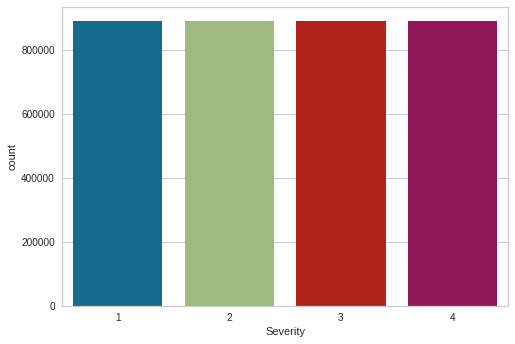

In [ ]:
sns.countplot(Y_s)

In [ ]:
#splitting dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_s,Y_s,test_size=0.2)

In [ ]:
X_train.shape

(2847692, 37)

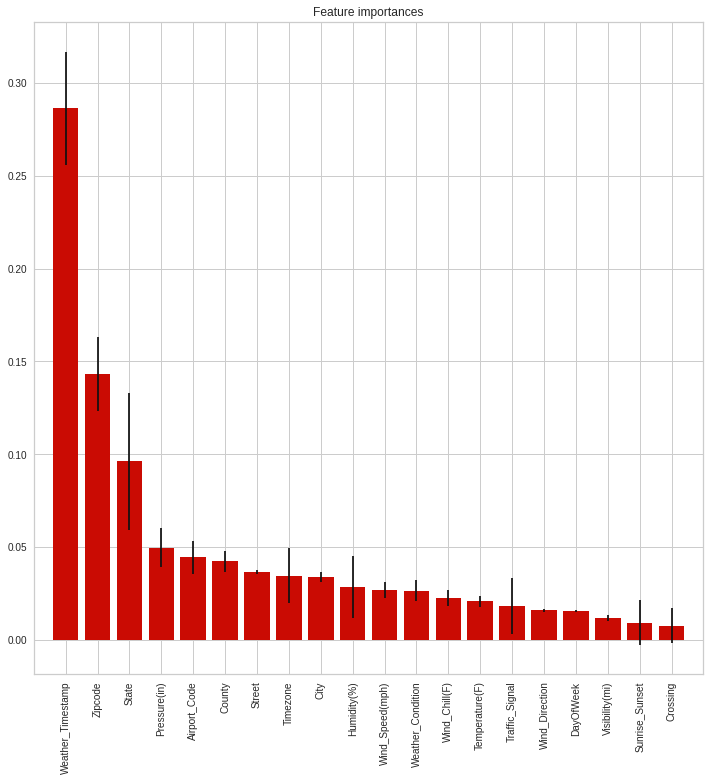

In [ ]:
#model feature selection for top 20 important feature for prediction out of 37
from sklearn import ensemble
fearture_name = X_train.columns.values
model = ensemble.RandomForestClassifier(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(X_train,y_train)

#plot imp
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
fearture_name[indices]

array(['Weather_Timestamp', 'Zipcode', 'State', 'Pressure(in)',
       'Airport_Code', 'County', 'Street', 'Timezone', 'City',
       'Humidity(%)', 'Wind_Speed(mph)', 'Weather_Condition',
       'Wind_Chill(F)', 'Temperature(F)', 'Traffic_Signal',
       'Wind_Direction', 'DayOfWeek', 'Visibility(mi)', 'Sunrise_Sunset',
       'Crossing'], dtype=object)

In [ ]:
select_from_model_list  = fearture_name[indices].tolist()

Decision Tree Classifier

Accuracy Score:  0.5931967457200488


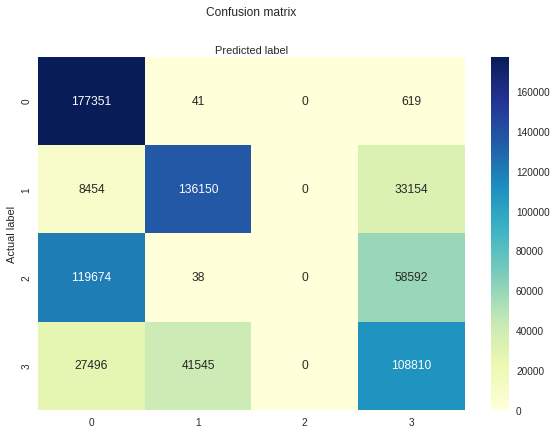

              precision    recall  f1-score   support

           1       0.53      1.00      0.69    178011
           2       0.77      0.77      0.77    177758
           3       0.00      0.00      0.00    178304
           4       0.54      0.61      0.57    177851

    accuracy                           0.59    711924
   macro avg       0.46      0.59      0.51    711924
weighted avg       0.46      0.59      0.51    711924



In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='gini',max_depth=2, min_samples_split=2,
                                     random_state=0)
dt = decision_tree_model
dt.fit(X_train[select_from_model_list],y_train)
y_pred = dt.predict(X_test[select_from_model_list])
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Classification Report
print(classification_report(y_test, y_pred))

AdaBoost Classifier

Accuracy Score:  0.6928169298970115


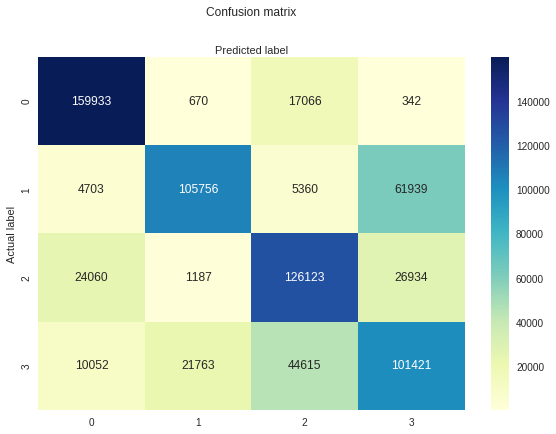

              precision    recall  f1-score   support

           1       0.80      0.90      0.85    178011
           2       0.82      0.59      0.69    177758
           3       0.65      0.71      0.68    178304
           4       0.53      0.57      0.55    177851

    accuracy                           0.69    711924
   macro avg       0.70      0.69      0.69    711924
weighted avg       0.70      0.69      0.69    711924



In [ ]:
adb_model = AdaBoostClassifier()

adb = adb_model
adb.fit(X_train[select_from_model_list],y_train)
y_pred = adb.predict(X_test[select_from_model_list])
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Classification Report
print(classification_report(y_test, y_pred))

Naive Bayes Classifier

Accuracy Score:  0.6072094774161287


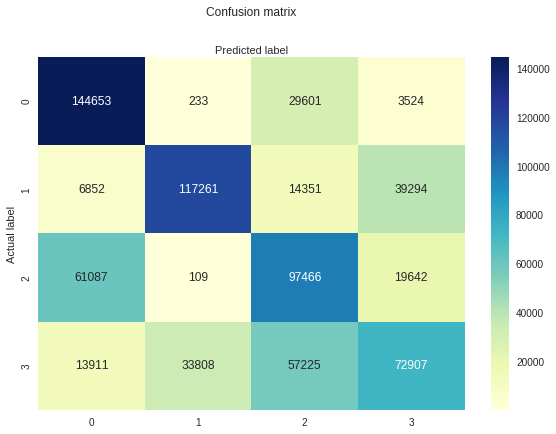

              precision    recall  f1-score   support

           1       0.64      0.81      0.72    178011
           2       0.77      0.66      0.71    177758
           3       0.49      0.55      0.52    178304
           4       0.54      0.41      0.47    177851

    accuracy                           0.61    711924
   macro avg       0.61      0.61      0.60    711924
weighted avg       0.61      0.61      0.60    711924



In [ ]:
nb_model = GaussianNB()

nb = nb_model
nb.fit(X_train[select_from_model_list],y_train)
y_pred = nb.predict(X_test[select_from_model_list])
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Classification Report
print(classification_report(y_test, y_pred))



```
# This is formatted as code
```

Random Forest Classifier

Accuracy Score:  0.9881883459470393


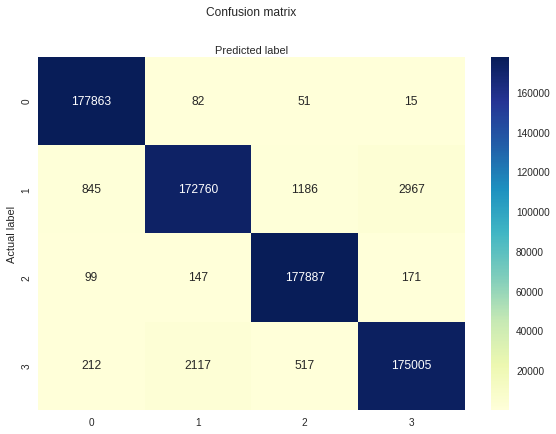

              precision    recall  f1-score   support

           1       0.99      1.00      1.00    178011
           2       0.99      0.97      0.98    177758
           3       0.99      1.00      0.99    178304
           4       0.98      0.98      0.98    177851

    accuracy                           0.99    711924
   macro avg       0.99      0.99      0.99    711924
weighted avg       0.99      0.99      0.99    711924



In [ ]:
random_forest_model = RandomForestClassifier()
rf = random_forest_model
rf.fit(X_train[select_from_model_list],y_train)
y_pred = rf.predict(X_test[select_from_model_list])
#accuracy score
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
#confusion Matrix
matrix =confusion_matrix(y_test, y_pred)
class_names=[1,2,3,4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
#Classification Report
print(classification_report(y_test, y_pred))